In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn import metrics
from xgboost import XGBRegressor

In [49]:
car_dataset=pd.read_csv('/content/drive/MyDrive/Datasets/Car details v3.csv')

In [50]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [51]:
car_dataset.shape

(8128, 13)

In [52]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [53]:
car_dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [54]:
car_dataset['seats'].fillna(car_dataset['seats'].mean(),inplace=True)

In [55]:
car_dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats              0
dtype: int64

In [56]:
car_dataset['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [31]:
print(car_dataset['transmission'].value_counts())
print(car_dataset['seller_type'].value_counts())

0    7078
1    1050
Name: transmission, dtype: int64
0    6766
1    1126
2     236
Name: seller_type, dtype: int64


In [57]:
#Label Encoding
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3},'transmission':{'Manual':0,'Automatic':1},'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [58]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [59]:
print(car_dataset['owner'].value_counts())

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


In [60]:
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [61]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [62]:
X=car_dataset.drop(columns={'name','selling_price','mileage','engine','max_power','torque'},axis=1)
Y=car_dataset['selling_price']

In [63]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  seats
0     2014     145500     1            0             0      0    5.0
1     2014     120000     1            0             0      1    5.0
2     2006     140000     0            0             0      2    5.0
3     2010     127000     1            0             0      0    5.0
4     2007     120000     0            0             0      0    5.0
...    ...        ...   ...          ...           ...    ...    ...
8123  2013     110000     0            0             0      0    5.0
8124  2007     119000     1            0             0      3    5.0
8125  2009     120000     1            0             0      0    5.0
8126  2013      25000     1            0             0      0    5.0
8127  2013      25000     1            0             0      0    5.0

[8128 rows x 7 columns]


In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=2)

In [65]:
print(X.shape,X_train.shape,X_test.shape)

(8128, 7) (6908, 7) (1220, 7)


In [66]:
#Model Training
#Linear Regression Model
lin_reg_model=LinearRegression()

In [67]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [68]:
X_train_prediction=lin_reg_model.predict(X_train)


In [70]:
#R squared error
error_score=metrics.r2_score(Y_train,X_train_prediction)
print("R squared error: ",error_score)

R squared error:  0.46850360543380676


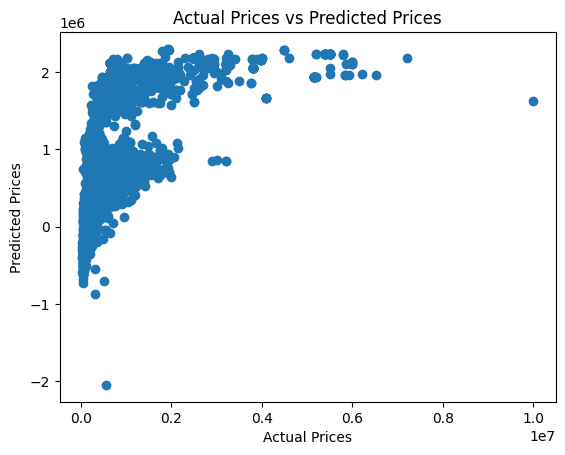

In [71]:
#Visualize the actual prices and the predicted prices
plt.scatter(Y_train,X_train_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [72]:
X_test_prediction=lin_reg_model.predict(X_test)

In [73]:
error_score=metrics.r2_score(Y_test,X_test_prediction)
print("R squared error: ",error_score)

R squared error:  0.4760612391048822


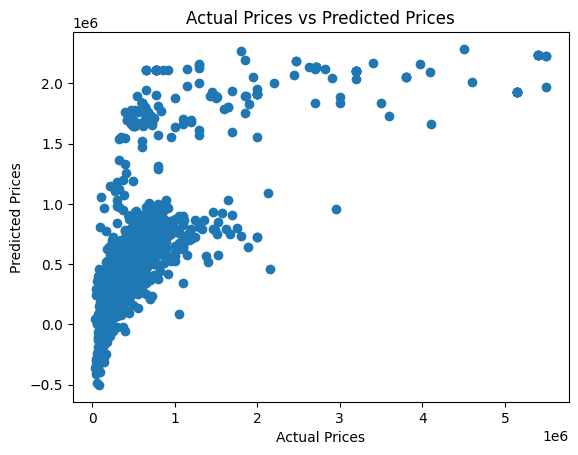

In [74]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [75]:
#Lasso Regression
lasso_reg_model=Lasso()

In [76]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [77]:
training_data_prediction=lasso_reg_model.predict(X_train)

In [78]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.4685036054046571


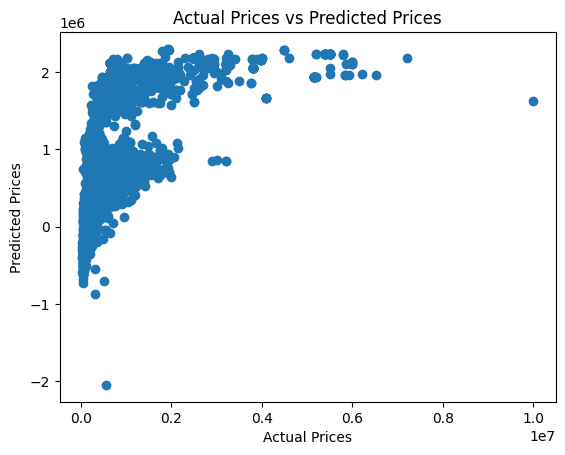

In [79]:
#Visualize the actual prices and the predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [80]:
test_data_prediction=lasso_reg_model.predict(X_test)

In [81]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.4760616138206235


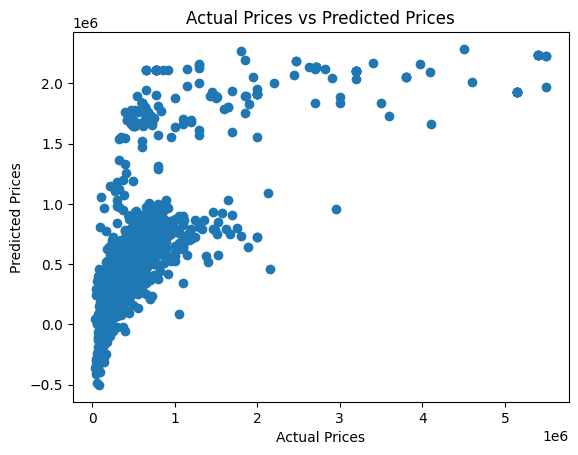

In [82]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [84]:
#XGBRegressor Model
xg_reg_model=XGBRegressor()

In [85]:
xg_reg_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
training_data_prediction=xg_reg_model.predict(X_train)

In [87]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.949223534116419


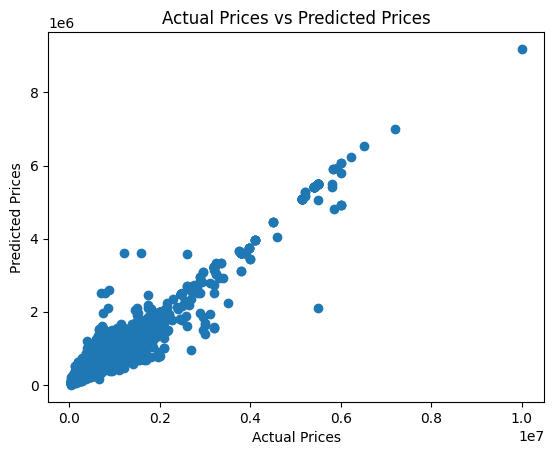

In [88]:
#Visualize the actual prices and the predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [89]:
test_data_prediction=xg_reg_model.predict(X_test)

In [90]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.8186394517807662


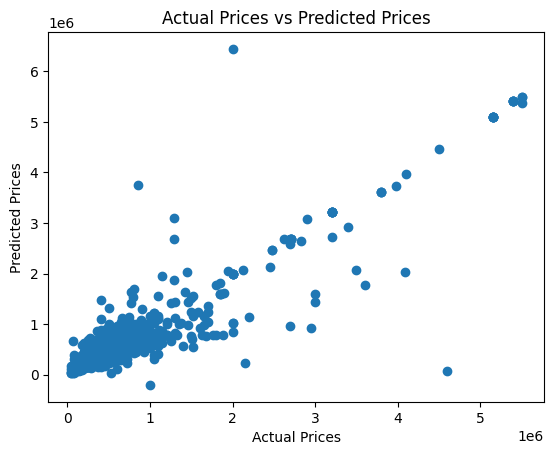

In [91]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()